# Clustering jerárquico y dendrogramas
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos 
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


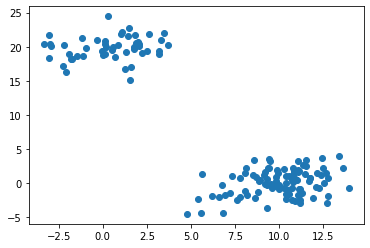

In [2]:
np.random.seed(4710)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size =[100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size =[50,])
x = np.concatenate((a,b))
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [3]:
z = linkage(x, "ward")

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [5]:
c, coph_dist = cophenet(z, pdist(x))
c

0.9799492210645141

In [6]:
z[0]

array([4.40000000e+01, 6.60000000e+01, 8.67672505e-03, 2.00000000e+00])

In [7]:
z[1]

array([7.50000000e+01, 9.00000000e+01, 4.68140537e-02, 2.00000000e+00])

In [8]:
z[:20]

array([[4.40000000e+01, 6.60000000e+01, 8.67672505e-03, 2.00000000e+00],
       [7.50000000e+01, 9.00000000e+01, 4.68140537e-02, 2.00000000e+00],
       [1.00000000e+00, 6.90000000e+01, 5.49837074e-02, 2.00000000e+00],
       [2.90000000e+01, 5.90000000e+01, 6.85348115e-02, 2.00000000e+00],
       [1.00000000e+01, 2.60000000e+01, 7.01419000e-02, 2.00000000e+00],
       [0.00000000e+00, 7.30000000e+01, 8.96265737e-02, 2.00000000e+00],
       [1.15000000e+02, 1.49000000e+02, 9.32544694e-02, 2.00000000e+00],
       [8.00000000e+01, 8.90000000e+01, 9.74120417e-02, 2.00000000e+00],
       [2.20000000e+01, 8.70000000e+01, 1.29280001e-01, 2.00000000e+00],
       [1.50000000e+01, 1.51000000e+02, 1.35148241e-01, 3.00000000e+00],
       [8.80000000e+01, 9.70000000e+01, 1.62863239e-01, 2.00000000e+00],
       [3.30000000e+01, 4.30000000e+01, 1.63341624e-01, 2.00000000e+00],
       [5.50000000e+01, 6.30000000e+01, 1.78062816e-01, 2.00000000e+00],
       [1.00000000e+02, 1.14000000e+02, 1.80963648e

In [9]:
print(z[152 - len(x)])
print(z[158 - len(x)])

[1.00000000e+00 6.90000000e+01 5.49837074e-02 2.00000000e+00]
[22.      87.       0.12928  2.     ]


In [10]:
x[[33,62,68]]

array([[ 9.22132936, -0.14941205],
       [10.40840046,  1.07778651],
       [10.95327131, -2.66007006]])

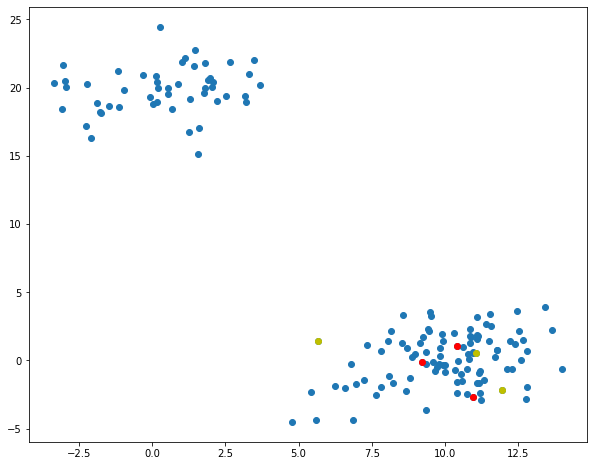

In [11]:
idx = [33, 62, 68]
idx2 = [15, 64, 41]
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[idx,0], x[idx,1],c='r')
plt.scatter(x[idx2,0], x[idx2,1],c='y')
plt.show()

### Representación gráfica de un dendrograma

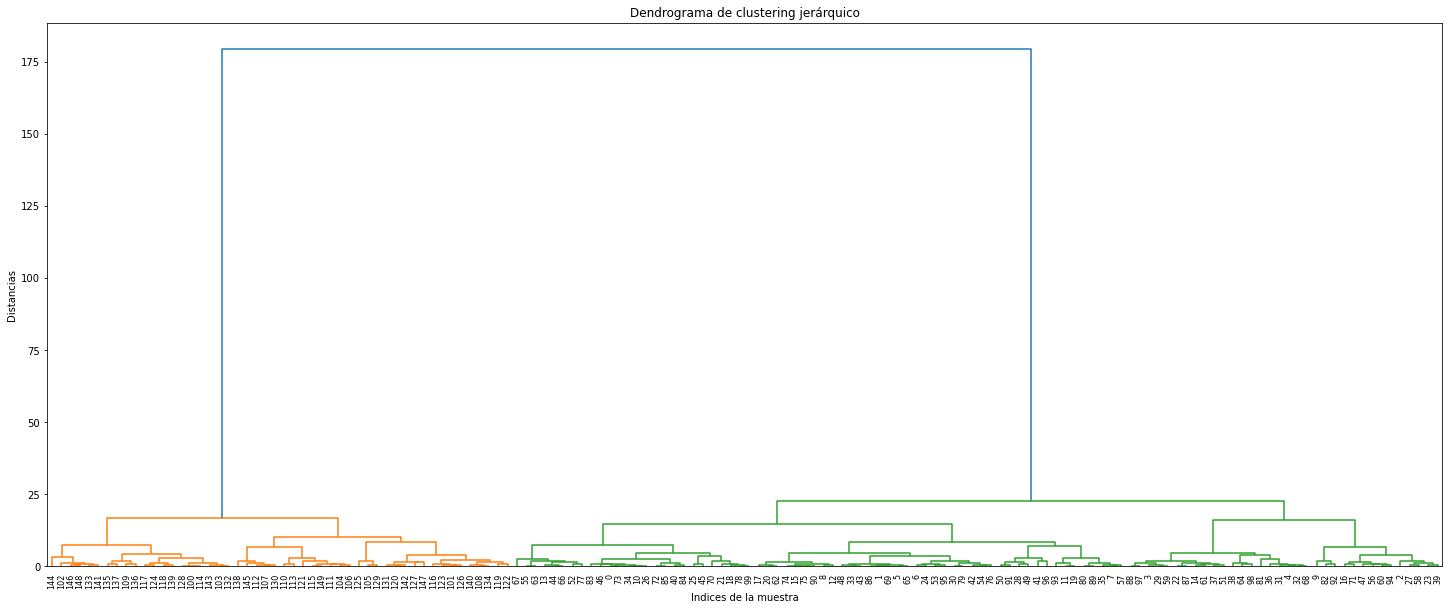

In [12]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de clustering jerárquico")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

In [13]:
z[-4:,]

array([[285.        , 286.        ,  16.13945255,  34.        ],
       [290.        , 293.        ,  16.74748905,  50.        ],
       [294.        , 295.        ,  22.76327633, 100.        ],
       [296.        , 297.        , 179.52733796, 150.        ]])

### Truncar el dendrograma

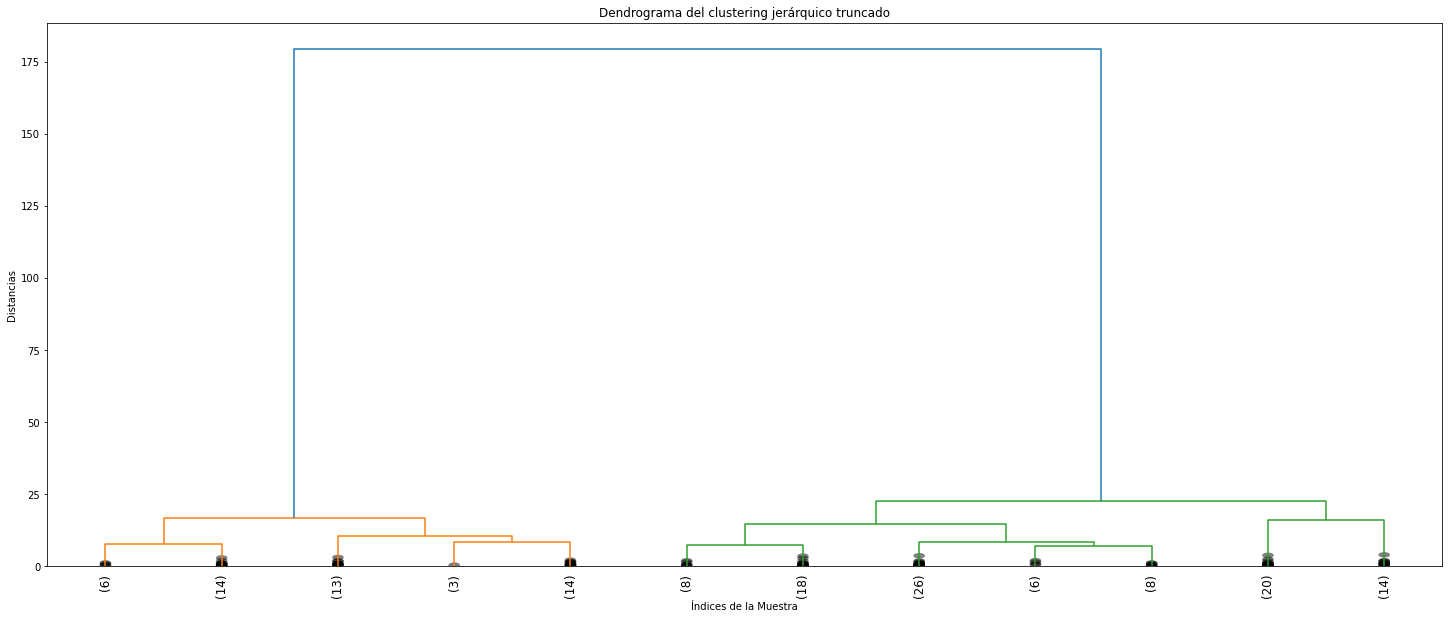

In [14]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()

### Dendrograma tuneado

In [15]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

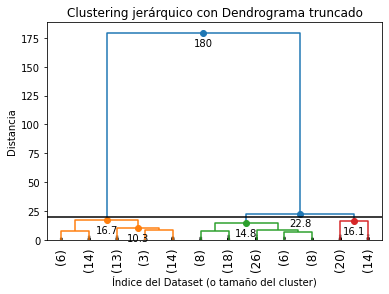

In [16]:
dendrogram_tune(z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20)
plt.show()

### Corte automático del dendrograma
inconsistency_i = (h_i-avg(h_j))/std(h_j)

In [17]:
from scipy.cluster.hierarchy import inconsistent

In [20]:
depth = 3
incons = inconsistent(z, depth)
incons[-10:]

array([[ 3.82078973,  2.0035328 ,  6.        ,  1.81591002],
       [ 3.56018433,  2.25616721,  6.        ,  1.78744744],
       [ 4.47071607,  2.43119568,  7.        ,  1.60629275],
       [ 3.09970193,  2.82155952,  6.        ,  1.87043877],
       [ 5.17374522,  3.34171552,  7.        ,  1.54659033],
       [ 7.09246781,  3.91071575,  7.        ,  1.961794  ],
       [ 5.602821  ,  4.93592568,  7.        ,  2.13468197],
       [ 8.21189691,  4.44183286,  7.        ,  1.9216374 ],
       [11.57212944,  6.49276927,  7.        ,  1.72363231],
       [38.26814531, 62.47751045,  7.        ,  2.26096065]])

### Método del Codo

[179.52733796  22.76327633  16.74748905  16.13945255  14.76448649
  10.34201013   8.37725625   8.37592805   7.59296464   7.45902503]


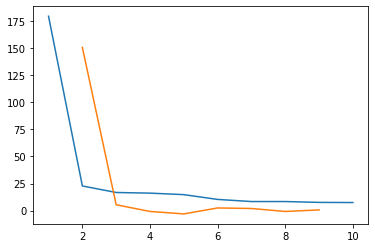

El número óptimo de cluster es 2


In [25]:
last = z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax()+2
print("El número óptimo de cluster es %s"%str(k))

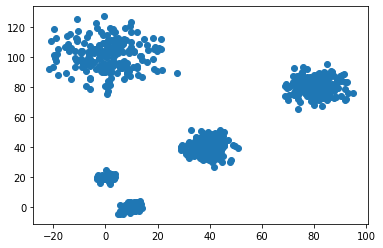

In [26]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
x2 = np.concatenate((x,c,d,e),)
plt.scatter(x2[:,0], x2[:,1])
plt.show()

In [27]:
z2 = linkage(x2, "ward")

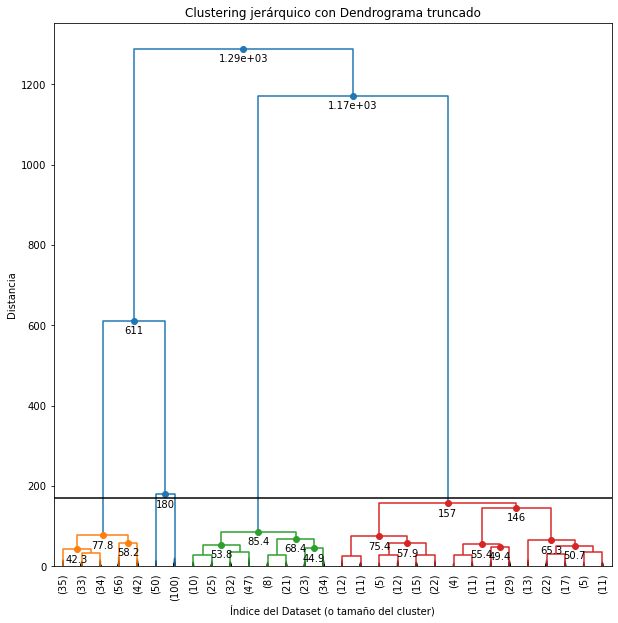

In [30]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above = 40,
    max_d = 170
)

plt.show()

[1288.43690214 1170.71200032  611.40690162  179.52733796  156.68695394
  145.51554562   85.43539539   77.75395223   75.39898128   68.44707191]


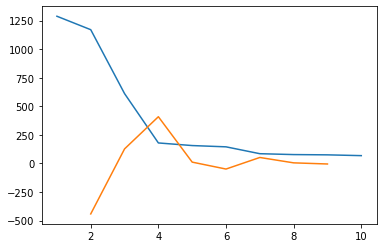

El número óptimo de cluster es 4


In [32]:
last = z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [34]:
print(inconsistent(z2, 5)[-10:])

[[ 11.08580079  14.39014097  29.           3.98615074]
 [ 13.12533093  16.40464543  31.           3.79609853]
 [ 16.06036118  16.76267068  31.           3.68041538]
 [ 19.1466674   19.60595312  31.           3.38105103]
 [ 24.12335964  28.66925134  29.           4.23422937]
 [ 34.00562761  36.52987229  31.           3.35838366]
 [ 12.18274825  32.02467348  30.           5.22548934]
 [ 42.551882   110.64458012  31.           5.14128228]
 [ 79.26227406 205.64345759  31.           5.30748578]
 [146.64152644 309.19248859  31.           3.69283025]]


### Recuperar los clusters y sus elementos

In [36]:
from scipy.cluster.hierarchy import fcluster

In [37]:
max_d = 20
clusters = fcluster(z, max_d, criterion="distance")
clusters

array([2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [38]:
k = 3
clusters = fcluster(z, k, criterion="maxclust")
clusters

array([2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [39]:
fcluster(z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

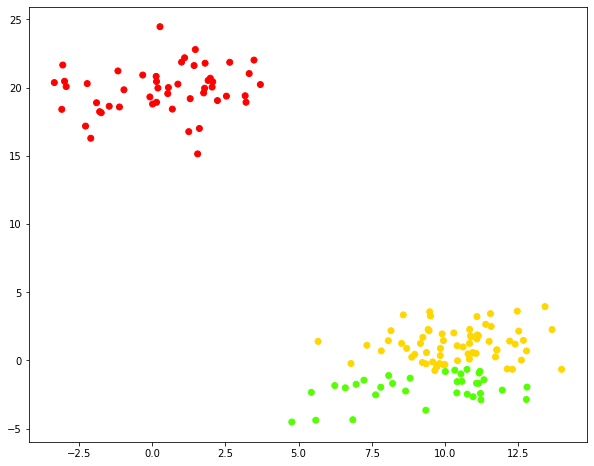

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1], c = clusters, cmap="prism")
plt.show()

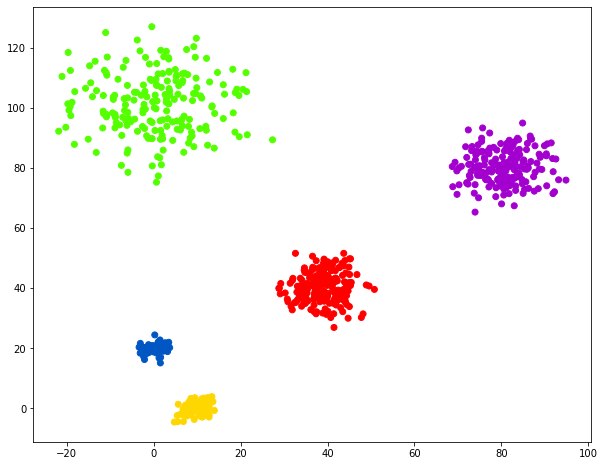

In [43]:
max_d = 170
clusters = fcluster(z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(x2[:,0], x2[:,1], c = clusters, cmap="prism")
plt.show()